# Eintscheidungsgrenze bei der Logistischen Regression

In [1]:
import pandas as pd

df = pd.read_csv("data/classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.88


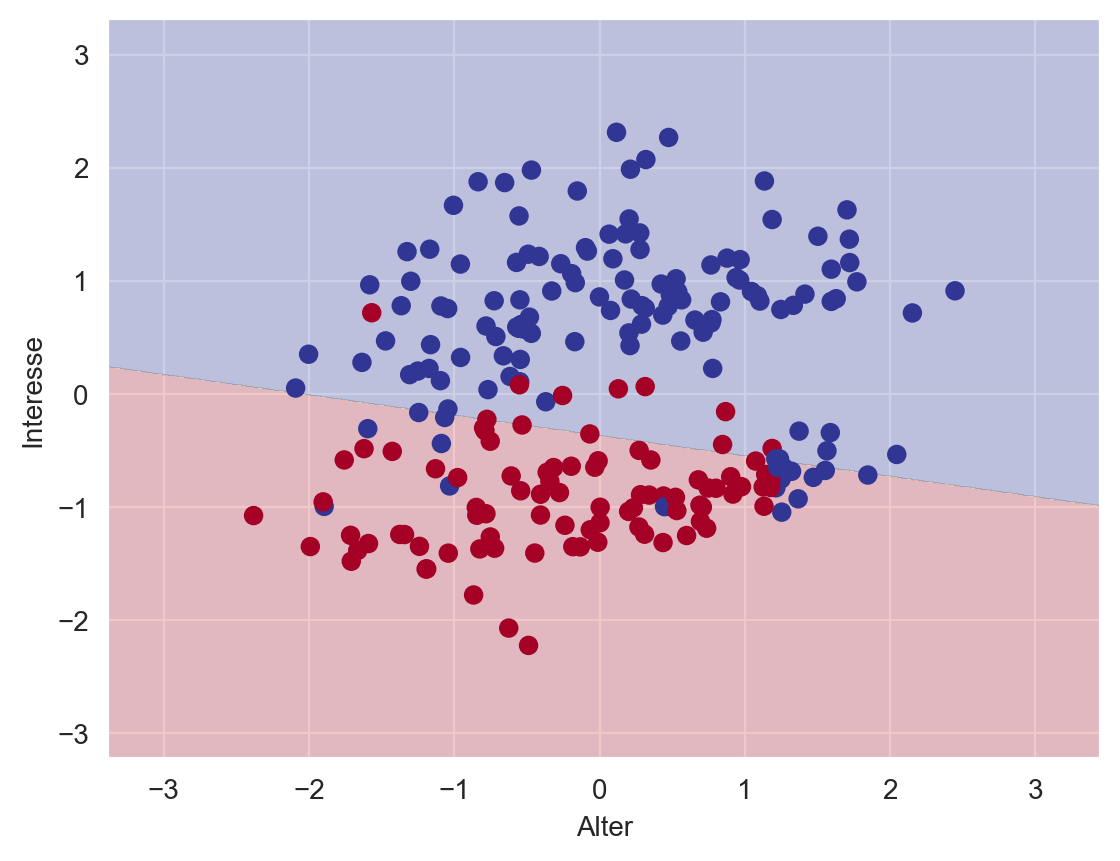

In [5]:
# Hinweis: Damit dieser Befehl funktioniert, muss die 
# "helper.py" - Datei im selben Ordner liegen, wie das
# aktuelle Jupyter Notebook

from helper import plot_classifier

# Trainings-Daten plotten
plot_classifier(model, X_train, y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")
#blau ist True,   rot ist False
#Man sieht nun die Punkte vor falschem Farbhintergrund.

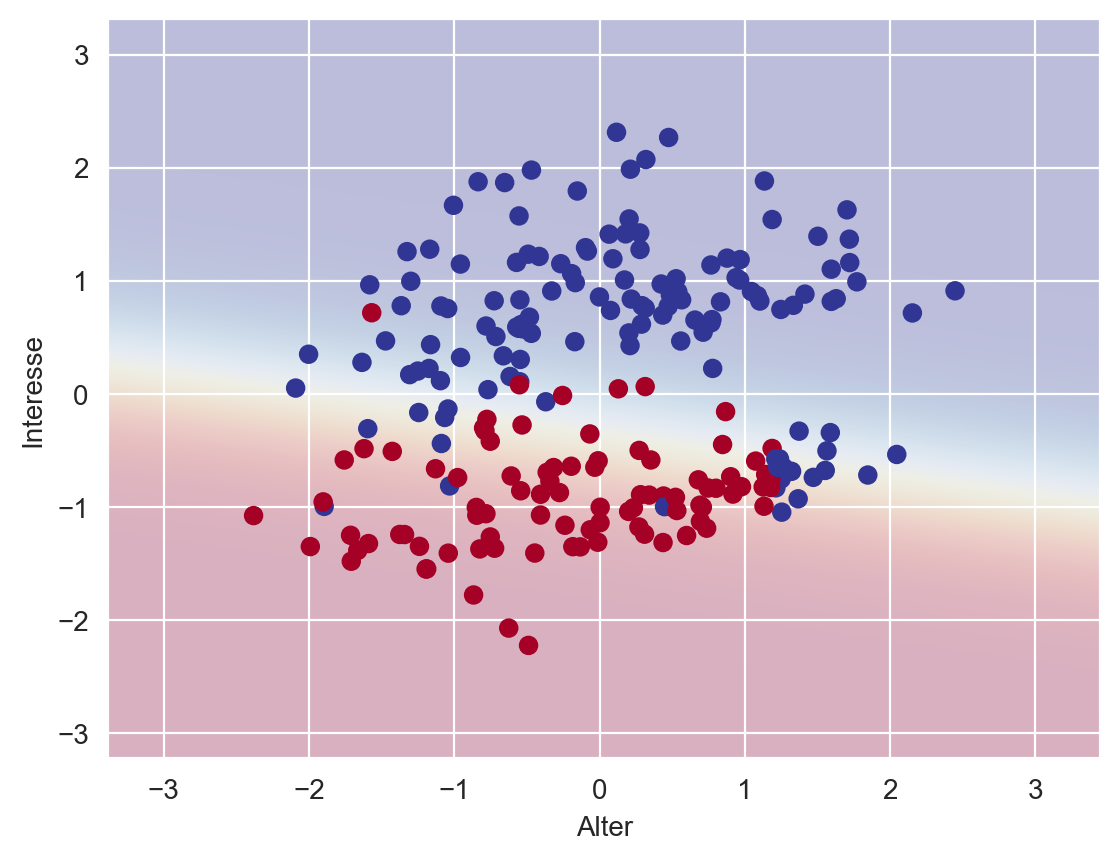

In [6]:
#Mit proba=True kann man den Übergangsbereich visualsisieren. Das ist der Bereich, 
#wo sich das Modell sozusagen unsicherer ist als in den Bereichen entfernt von der Mitte 
plot_classifier(model, X_train, y_train, proba = True, xlabel = "Alter", ylabel = "Interesse")

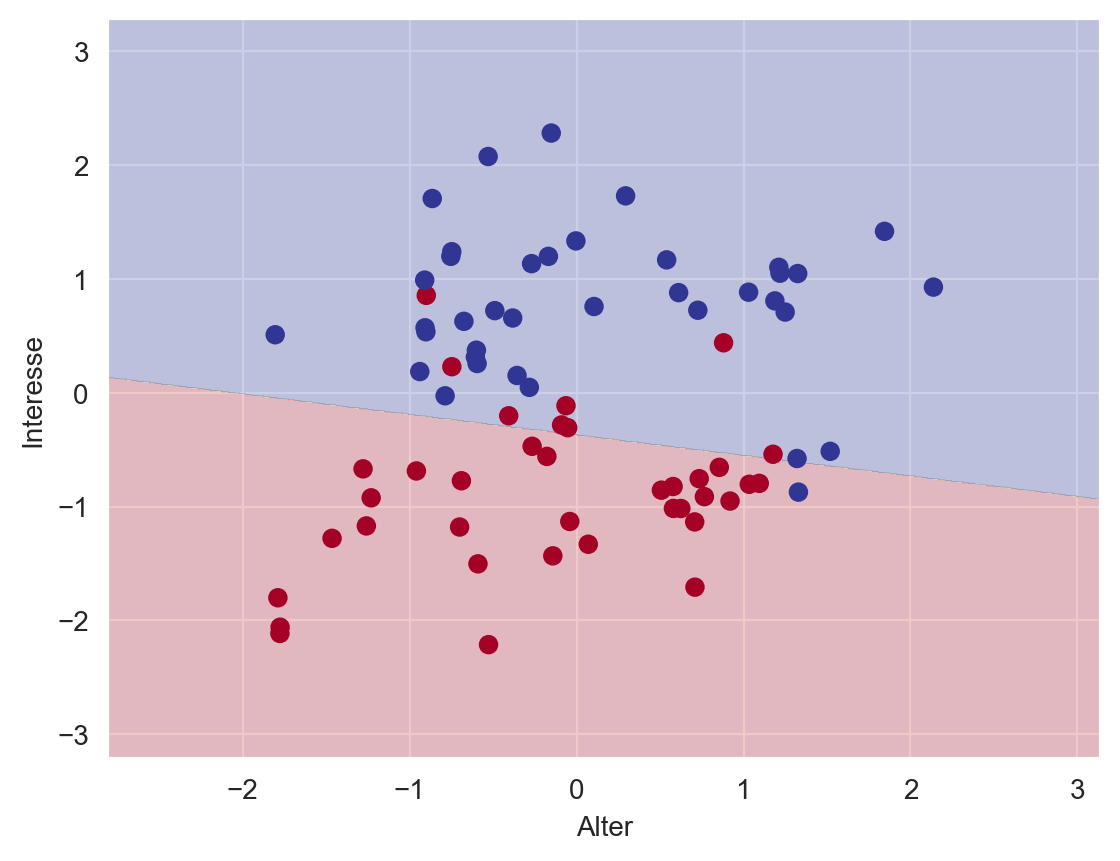

In [7]:
# Testdaten plotten

plot_classifier(model, X_test, y_test, proba = False, xlabel = "Alter", ylabel = "Interesse")

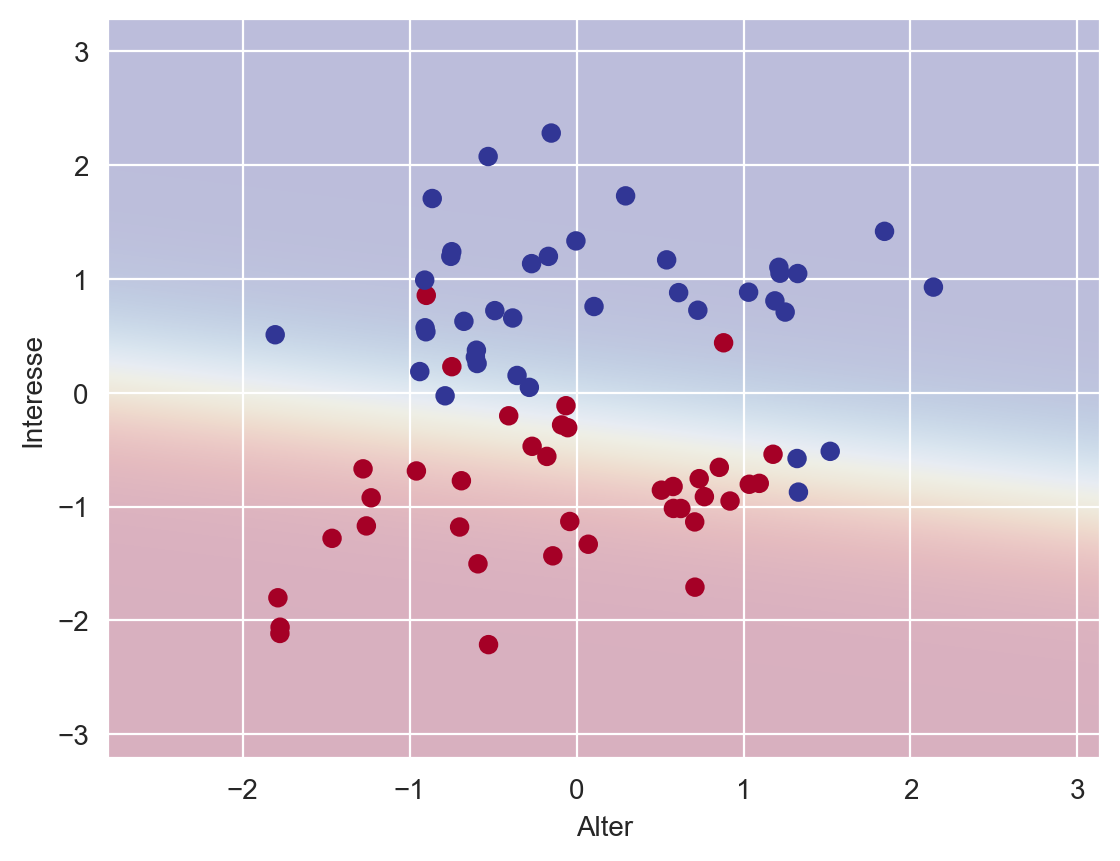

In [8]:
plot_classifier(model, X_test, y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")

In [9]:
# ...es gibt wenige Falschzuweisungen außerhalb des Übergangsbereichs.

## Was macht helper.py eigentlich?

C:\Users\jacqu\AppData\Local\Temp\ipykernel_22348\2960084374.py:13: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')
C:\Users\jacqu\AppData\Local\Temp\ipykernel_22348\2960084374.py:14: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('config InlineBackend.figure_formats = set(["retina"])')


[3.75738074e-05 3.76965621e-05 3.78197179e-05 ... 9.99997329e-01
 9.99997338e-01 9.99997347e-01]
----
(1000, 1000)
----
[[3.75738074e-05 3.76965621e-05 3.78197179e-05 ... 9.70116581e-04
  9.73283015e-04 9.76459775e-04]
 [3.83247719e-05 3.84499800e-05 3.85755971e-05 ... 9.89487261e-04
  9.92716858e-04 9.95956986e-04]
 [3.90907450e-05 3.92184554e-05 3.93465831e-05 ... 1.00924433e-03
  1.01253835e-03 1.01584311e-03]
 ...
 [9.99928196e-01 9.99928429e-01 9.99928663e-01 ... 9.99997221e-01
  9.99997230e-01 9.99997239e-01]
 [9.99929603e-01 9.99929832e-01 9.99930060e-01 ... 9.99997276e-01
  9.99997285e-01 9.99997293e-01]
 [9.99930982e-01 9.99931207e-01 9.99931431e-01 ... 9.99997329e-01
  9.99997338e-01 9.99997347e-01]]


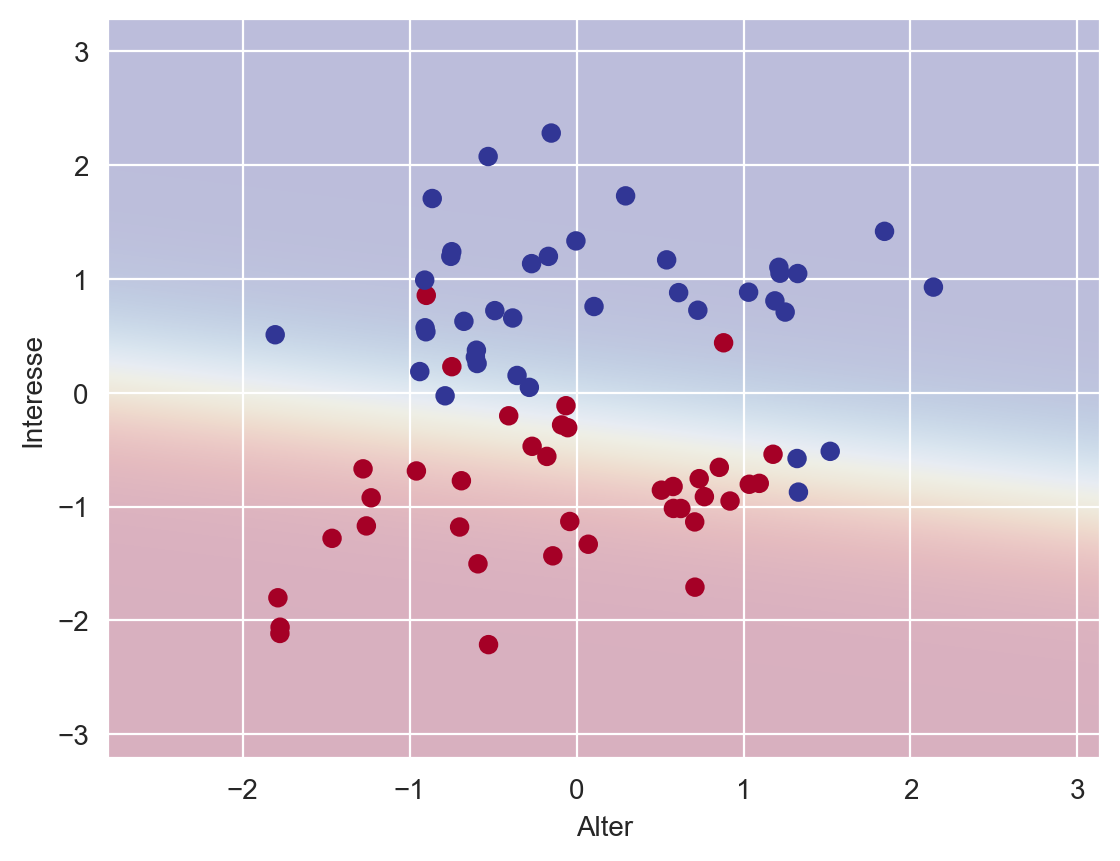

In [10]:
#Man kann helper.py auch hier ins Notebook per copy&paste ziehen, dann können
#wir leichter Änderungen und Einblicke realisieren
#Achtung! - Nach dem Ausführen dieses Blocks die obigen Notes nicht mehr ausführen,
# sonst kommt es zu einer Rekursion

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    #die folgenden 2 Zeilen würde man in Jupyter als 
    # %matplotlib inline usw. einfügen
    get_ipython().magic('matplotlib inline')
    get_ipython().magic('config InlineBackend.figure_formats = set(["retina"])')
except NameError:
    pass

def plot_classifier(model, X, Z, proba = False, xlabel = None, ylabel = None):
    # https://matplotlib.org/examples/color/colormaps_reference.html
    plt.set_cmap("RdYlBu")
    
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000)
    )
    
    if proba:
        zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        plt.imshow(zz.reshape(xx.shape), 
                   origin = "lower", 
                   aspect = "auto", 
                   extent = (x_min, x_max, y_min, y_max), 
                   vmin = 0, 
                   vmax = 1, 
                   alpha = 0.25)
    else: 
        zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
        plt.contourf(xx, yy, zz.reshape(xx.shape), 
                     alpha = 0.25, #duchsichtig....
                     vmin = 0, 
                     vmax = 1)

    plt.scatter(X[:, 0], X[:, 1], c=Z)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
       
    if ylabel is not None:
        plt.ylabel(ylabel)
        
    # Damit wird die Grafik genau so groß angezeigt wie der
    # schattierte Farbbereich:
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    print(str(zz))
    print("----")
    print(str(xx.shape))
    print("----")
    print(str(zz.reshape(xx.shape)))
    plt.show()
    
#<-ganz nach links!!!    
plot_classifier(model, X_test, y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")

    


In [11]:
#Was machen linspace und meshgrid?
import numpy as np
np.linspace(-3,3, 10)

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [12]:
 xx, yy = np.meshgrid(
        np.linspace(-3, 3, 10),
        np.linspace(-3, 3, 10)
    )
xx 

array([[-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ],
       [-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667

In [13]:
xx.ravel() #nimmt eckicke Klammern weg

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ,
       -3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ,
       -3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ,
       -3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ,
       -3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ,
       -3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ,
       -3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.  

In [14]:
np.c_[xx.ravel(), yy.ravel()] # "np.c_" baut ein Array aus allen Kombinationen von x und y


array([[-3.        , -3.        ],
       [-2.33333333, -3.        ],
       [-1.66666667, -3.        ],
       [-1.        , -3.        ],
       [-0.33333333, -3.        ],
       [ 0.33333333, -3.        ],
       [ 1.        , -3.        ],
       [ 1.66666667, -3.        ],
       [ 2.33333333, -3.        ],
       [ 3.        , -3.        ],
       [-3.        , -2.33333333],
       [-2.33333333, -2.33333333],
       [-1.66666667, -2.33333333],
       [-1.        , -2.33333333],
       [-0.33333333, -2.33333333],
       [ 0.33333333, -2.33333333],
       [ 1.        , -2.33333333],
       [ 1.66666667, -2.33333333],
       [ 2.33333333, -2.33333333],
       [ 3.        , -2.33333333],
       [-3.        , -1.66666667],
       [-2.33333333, -1.66666667],
       [-1.66666667, -1.66666667],
       [-1.        , -1.66666667],
       [-0.33333333, -1.66666667],
       [ 0.33333333, -1.66666667],
       [ 1.        , -1.66666667],
       [ 1.66666667, -1.66666667],
       [ 2.33333333,